I decided to use the dataset from the decision trees classifier notebook on drugs to test each of the classifiers

## Data formatting

In [183]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score, log_loss
import urllib.request
import pylab as pl
import scipy.optimize as opt
%matplotlib inline

In [184]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
filename = 'drug200.csv'
urllib.request.urlretrieve(url, filename)

('drug200.csv', <http.client.HTTPMessage at 0x17a2bc9b0d0>)

In [185]:
drugs = pd.read_csv('drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [186]:
drugs['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A2BC9B250>]],
      dtype=object)

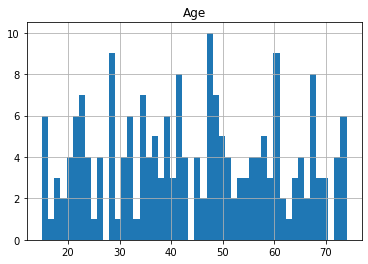

In [187]:
drugs.hist(column='Age', bins=50)

Coding data to make categorical data numerical

In [188]:
X = drugs[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Convert categorical data to numerical

In [189]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [190]:
y = drugs["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Normalize data

In [191]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.29, -1.04, -1.11, -0.97,  1.29],
       [ 0.16,  0.96,  0.11, -0.97, -0.42],
       [ 0.16,  0.96,  0.11, -0.97, -0.83],
       [-0.99, -1.04,  1.33, -0.97, -1.15],
       [ 1.01, -1.04,  0.11, -0.97,  0.27]])

## Train Test Split

In [192]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


## K-nearest neighbour

In [193]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [194]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC'], dtype=object)

In [195]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9
Test set Accuracy:  0.75


Best value of k

In [196]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88, 0.85, 0.82, 0.75, 0.72, 0.75, 0.7 , 0.72, 0.65])

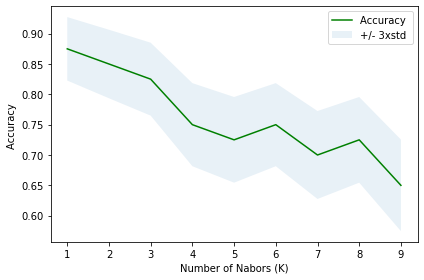

In [197]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [198]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.875 with k= 1


## Decision trees

Using same data from KNN classifier

In [199]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

In [200]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.95


In [201]:
depth = 10
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)

    
    std_acc[n-1]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

mean_acc

array([0.62, 0.78, 0.82, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95])

In [202]:
print( "The best accuracy was with", mean_acc.max(), "with max-depth =", mean_acc.argmax()+1) 

The best accuracy was with 0.95 with max-depth = 4


## Support Vector Machine

Using same data from KNN classifier

In [203]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [204]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC'], dtype=object)

In [205]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       drugA       0.83      0.83      0.83         6
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         5
       drugX       0.91      0.91      0.91        11
       drugY       0.88      0.93      0.90        15

    accuracy                           0.90        40
   macro avg       0.92      0.87      0.89        40
weighted avg       0.90      0.90      0.90        40

Confusion matrix, without normalization
[[10  1  0  0  0]
 [ 1 14  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0  5]]


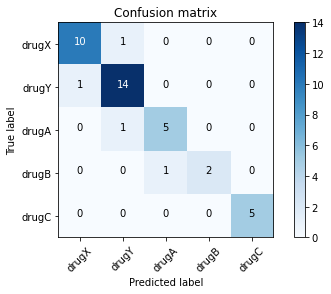

In [206]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['drugX', 'drugY', 'drugA', 'drugB', 'drugC'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['drugX','drugY', 'drugA', 'drugB', 'drugC'],normalize= False,  title='Confusion matrix')

In [207]:
print("The f1 score = %f" % (f1_score(y_test, yhat, average='weighted')) )

The f1 score = 0.898710


In [208]:
print("The jaccard score = %f" % (jaccard_score(y_test, yhat, average='weighted')))

The jaccard score = 0.820133


Confusion matrix, without normalization
[[ 7  4  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0  5]]
The f1 score = 0.868233
The jaccard score = 0.774624


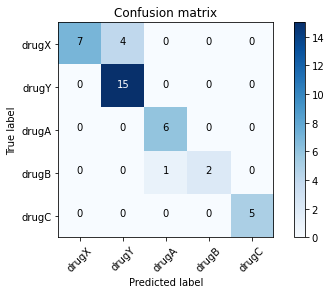

In [209]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 
yhat_linear = clf_linear.predict(X_test)
cnf_matrix_linear = confusion_matrix(y_test, yhat_linear, labels=['drugX', 'drugY', 'drugA', 'drugB', 'drugC'])
np.set_printoptions(precision=2)

classification_report(y_test, yhat_linear)

plt.figure()
plot_confusion_matrix(cnf_matrix_linear, classes=['drugX','drugY', 'drugA', 'drugB', 'drugC'],normalize= False,  title='Confusion matrix')

print("The f1 score = %f" % (f1_score(y_test, yhat_linear, average='weighted')) )
print("The jaccard score = %f" % (jaccard_score(y_test, yhat_linear, average='weighted')))

Confusion matrix, without normalization
[[11  0  0  0  0]
 [ 1 14  0  0  0]
 [ 0  2  4  0  0]
 [ 0  2  1  0  0]
 [ 0  4  0  0  1]]
The f1 score = 0.697585
The jaccard score = 0.591058


C:\Users\callm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


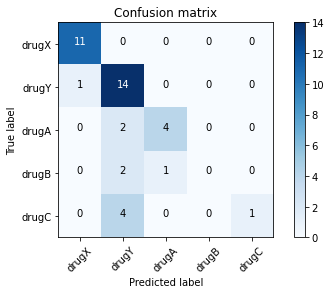

In [210]:
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train) 
yhat_poly = clf_poly.predict(X_test)
cnf_matrix_poly = confusion_matrix(y_test, yhat_poly, labels=['drugX', 'drugY', 'drugA', 'drugB', 'drugC'])
np.set_printoptions(precision=2)

classification_report(y_test, yhat_poly)

plt.figure()
plot_confusion_matrix(cnf_matrix_poly, classes=['drugX','drugY', 'drugA', 'drugB', 'drugC'],normalize= False,  title='Confusion matrix')

print("The f1 score = %f" % (f1_score(y_test, yhat_poly, average='weighted')) )
print("The jaccard score = %f" % (jaccard_score(y_test, yhat_poly, average='weighted')))

Confusion matrix, without normalization
[[10  1  0  0  0]
 [ 0 13  1  1  0]
 [ 0  1  5  0  0]
 [ 0  0  1  2  0]
 [ 0  1  0  0  4]]
The f1 score = 0.852917
The jaccard score = 0.752083


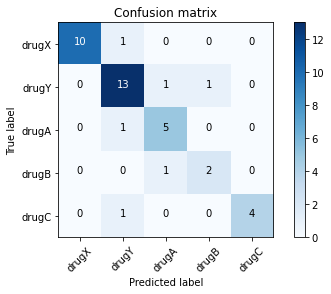

In [211]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train) 
yhat_sigmoid = clf_sigmoid.predict(X_test)
cnf_matrix_sigmoid = confusion_matrix(y_test, yhat_sigmoid, labels=['drugX', 'drugY', 'drugA', 'drugB', 'drugC'])
np.set_printoptions(precision=2)

classification_report(y_test, yhat_sigmoid)

plt.figure()
plot_confusion_matrix(cnf_matrix_sigmoid, classes=['drugX','drugY', 'drugA', 'drugB', 'drugC'],normalize= False,  title='Confusion matrix')

print("The f1 score = %f" % (f1_score(y_test, yhat_sigmoid, average='weighted')) )
print("The jaccard score = %f" % (jaccard_score(y_test, yhat_sigmoid, average='weighted')))

The best result was produced using the linear kernel of SVM

## Logistic regression

In [212]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [213]:
yhat = LR.predict(X_test)
yhat

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugX', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY'], dtype=object)

In [214]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.2 , 0.18, 0.17, 0.18, 0.27],
       [0.21, 0.17, 0.17, 0.19, 0.25],
       [0.16, 0.17, 0.16, 0.16, 0.36],
       [0.19, 0.22, 0.19, 0.15, 0.25],
       [0.19, 0.19, 0.19, 0.21, 0.21],
       [0.17, 0.18, 0.18, 0.3 , 0.16],
       [0.16, 0.18, 0.19, 0.23, 0.23],
       [0.17, 0.15, 0.19, 0.24, 0.25],
       [0.19, 0.18, 0.17, 0.16, 0.3 ],
       [0.22, 0.21, 0.2 , 0.18, 0.2 ],
       [0.22, 0.19, 0.18, 0.22, 0.19],
       [0.19, 0.18, 0.18, 0.25, 0.2 ],
       [0.23, 0.19, 0.2 , 0.2 , 0.18],
       [0.17, 0.16, 0.19, 0.24, 0.24],
       [0.18, 0.16, 0.17, 0.1 , 0.38],
       [0.17, 0.19, 0.15, 0.11, 0.37],
       [0.17, 0.2 , 0.16, 0.12, 0.35],
       [0.19, 0.19, 0.18, 0.25, 0.19],
       [0.21, 0.21, 0.18, 0.2 , 0.21],
       [0.2 , 0.19, 0.2 , 0.22, 0.19],
       [0.17, 0.19, 0.2 , 0.27, 0.17],
       [0.2 , 0.17, 0.2 , 0.22, 0.21],
       [0.21, 0.19, 0.18, 0.21, 0.21],
       [0.17, 0.18, 0.19, 0.25, 0.22],
       [0.19, 0.21, 0.2 , 0.21, 0.19],
       [0.2 , 0.21, 0.18,

In [215]:
jaccard_score(y_test, yhat, average='weighted')

0.5126575630252102

In [218]:
log_loss(y_test, yhat_prob)

1.395591415709331